In [1]:
# https://github.com/lmeazzini/Small-projects/blob/master/Credit_fraud.ipynb

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
train_df = pd.read_csv('../dataset/train.csv')
val_df = pd.read_csv('../dataset/val.csv')
test_df = pd.read_csv('../dataset/test.csv')

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,113842.0,1.420255e+05,82248.545392,3.000000,70796.750000,141722.000000,213359.500000,284803.000000
V1,113842.0,1.972910e-04,1.951060,-56.407510,-0.923479,0.012074,1.315373,2.454930
V2,113842.0,1.288795e-03,1.651064,-72.715728,-0.595602,0.066390,0.801687,21.467203
V3,113842.0,9.717363e-03,1.496916,-32.454198,-0.883877,0.183868,1.037120,4.187811
V4,113842.0,-4.169208e-03,1.412633,-5.600607,-0.853728,-0.019359,0.742208,16.491217
V5,113842.0,4.749962e-04,1.367533,-42.147898,-0.689853,-0.054060,0.614214,34.801666
V6,113842.0,5.141158e-03,1.330583,-26.160506,-0.766094,-0.272436,0.405285,23.917837
V7,113842.0,5.769024e-03,1.204111,-41.506796,-0.552071,0.039036,0.568750,44.054461
V8,113842.0,-2.450588e-03,1.185504,-50.943369,-0.209492,0.020970,0.328303,20.007208
V9,113842.0,-2.107069e-03,1.095415,-13.434066,-0.647477,-0.052157,0.590705,10.392889


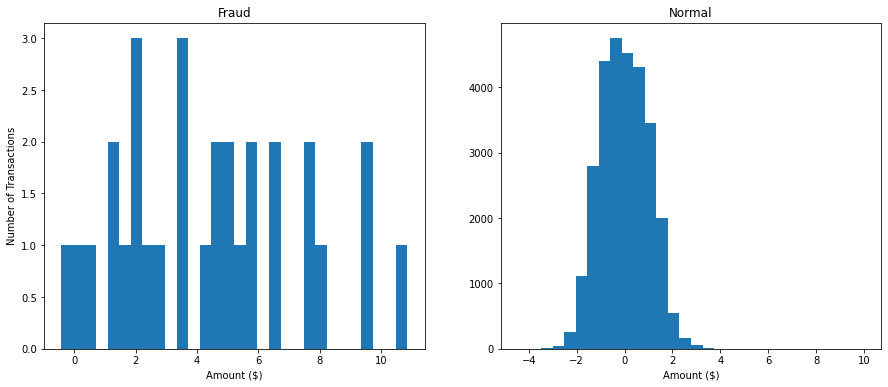

In [20]:
val_fraud = val_df[val_df['Class'] == 1]
val_ok = val_df[val_df['Class'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30
col = 'V11'

ax1.hist(val_fraud[col], bins=bins)
ax2.hist(val_ok[col], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Amount ($)')
ax2.set_xlabel('Amount ($)')
ax1.set_ylabel('Number of Transactions')

# ax2.set_ylim(0, 320)
plt.show()

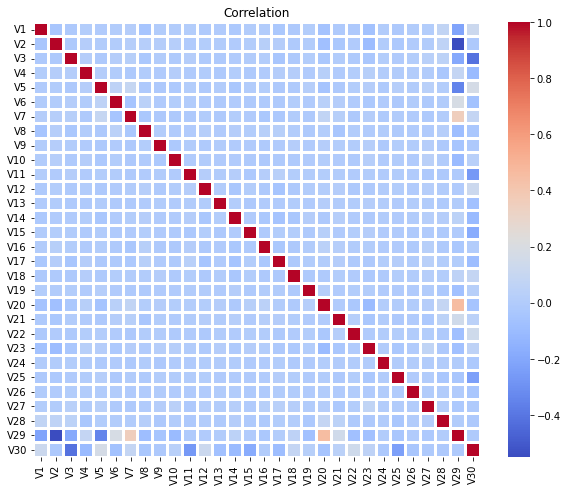

In [22]:
corr = val_df.drop(columns=['ID', 'Class']).corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white")
plt.title("Correlation")
plt.show()

In [75]:
val_df.shape

(28462, 32)

In [76]:
ok_sample = val_df[val_df['Class'] == 0].sample(28000)
df_tsne = ok_sample.append(val_fraud).sample(frac=1).reset_index(drop=True)
df_tsne.shape

/tmp/ipykernel_27975/3322868890.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tsne = ok_sample.append(val_fraud).sample(frac=1).reset_index(drop=True)


(28030, 32)

In [77]:
df_tsne.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'Class'],
      dtype='object')

In [78]:
X_tsne = df_tsne.drop(['Class', 'ID'], axis = 1).values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [79]:
X_tsne

array([[  3.5533905,  39.40345  ],
       [ 15.71785  ,  27.663816 ],
       [-12.686057 ,  11.656852 ],
       ...,
       [-54.1674   ,  -3.5122998],
       [ 30.369274 ,  23.085735 ],
       [-18.734324 ,  44.428345 ]], dtype=float32)

In [80]:
tsne_df = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
tsne_df['Class'] = y_tsne
tsne_df.head()

,tsne1,tsne2,Class
0,3.553391,39.403450,0
1,15.717850,27.663816,0
2,-12.686057,11.656852,0
3,70.564560,-26.587227,0
4,-35.695114,30.606426,0


In [81]:
tsne_df.shape

(28030, 3)

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

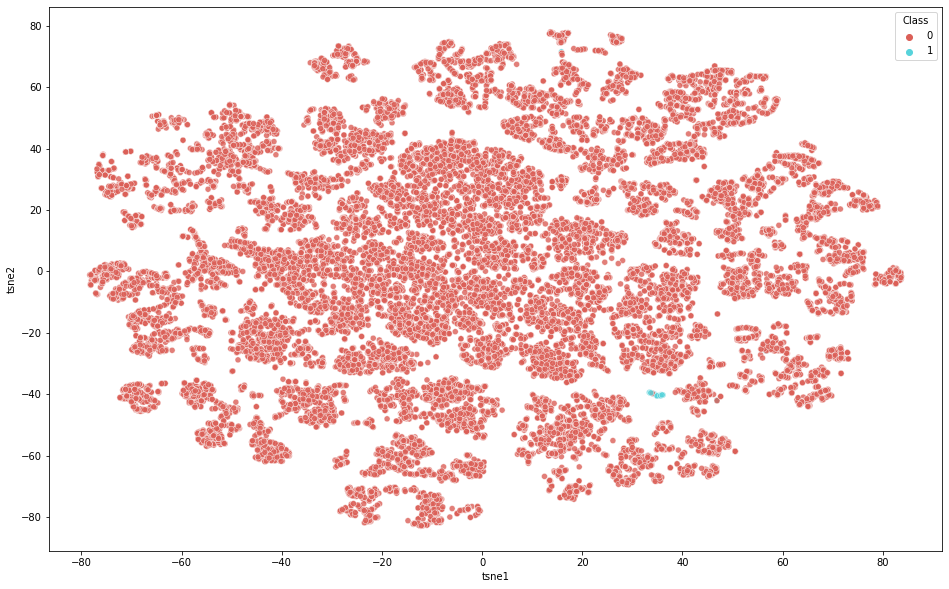

In [82]:
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_axes([0, 0, 1, 1])
# ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
#            marker='o', color='g', linewidth='1', alpha=0.8, label='Ok')
# ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
#            marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')
# ax.legend(loc='best')
# plt.show()
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne1', y='tsne2',
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.8
)